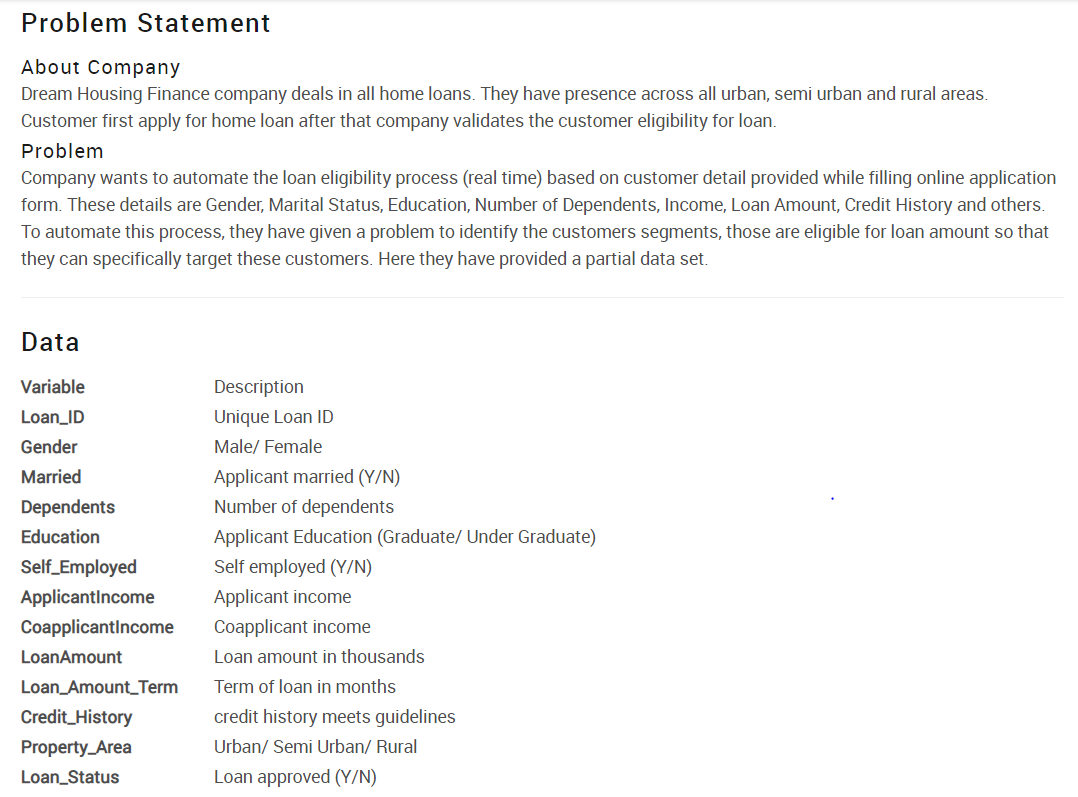

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# The Process:
1. Define Objective
2. Data Gathering
3. Data Preparation
4. Data Exploration
5. Model Building
6. Model Evaluation  
    *thereafer save model to external file*
7. Predictions

# 1. Define Objective

To automate loan eligibilty process based on customer provided details.

# 2. Data Gathering

In [2]:
test = pd.read_csv('test_lAUu6dG.csv')
train = pd.read_csv('train_ctrUa4K.csv')

In [11]:
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [24]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [17]:
print(train.shape)
train.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
print(test.shape)
test.head()

(367, 12)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# 3. Data Preparation

#### checking for null values

In [36]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
print('Gender: ', train.Gender.unique())
print('Married: ', train.Married.unique())
print('Dependents: ', train.Dependents.unique())
print('Education: ', train.Education.unique())
print('Self_Employed: ', train.Self_Employed.unique())
# print('ApplicantIncome: ', train.ApplicantIncome.unique())
# print('CoapplicantIncome: ', train.CoapplicantIncome.unique())
print('LoanAmount: ', train.LoanAmount.unique())
print('Loan_Amount_Term: ', train.Loan_Amount_Term.unique())
print('Credit_History: ', train.Credit_History.unique())
print('Property_Area: ', train.Property_Area.unique())
print('Loan_Status: ', train.Loan_Status.unique())

Gender:  ['Male' 'Female' nan]
Married:  ['No' 'Yes' nan]
Dependents:  ['0' '1' '2' '3+' nan]
Education:  ['Graduate' 'Not Graduate']
Self_Employed:  ['No' 'Yes' nan]
LoanAmount:  [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62

In [44]:
for column in train.columns:
    if len(train[f'{column}'].unique()) > len(train.LoanAmount.unique()):
        continue
    print(f'{column}: ', train[f'{column}'].unique())
#     print(column)

Gender:  ['Male' 'Female' nan]
Married:  ['No' 'Yes' nan]
Dependents:  ['0' '1' '2' '3+' nan]
Education:  ['Graduate' 'Not Graduate']
Self_Employed:  ['No' 'Yes' nan]
LoanAmount:  [ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62

#### dropping Loan_ID column

In [60]:
train1 = train.drop('Loan_ID', axis=1)

In [61]:
train1.shape

(614, 12)

#### preparing Gender column

Handling nan values by creating a new category for the missing values and using them as a different level.

In [62]:
train1.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [80]:
train2 = train1

In [81]:
train2.Gender = train1.Gender.fillna(value='no_gender')

In [82]:
train2.Gender.unique()

array(['Male', 'Female', 'no_gender'], dtype=object)

In [83]:
pd.get_dummies(train2.Gender)

,Female,Male,no_gender
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
609,1,0,0
610,0,1,0
611,0,1,0
612,0,1,0


In [85]:
train2 = pd.concat([train2, pd.get_dummies(train2.Gender).drop('no_gender', axis='columns')], axis='columns')

In [86]:
train2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1


In [89]:
# rows without gender values
train2[(train2.Female==0) & (train2.Male==0)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male
23,no_gender,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N,0,0
126,no_gender,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y,0,0
171,no_gender,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y,0,0
188,no_gender,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,0,0
314,no_gender,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N,0,0
334,no_gender,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y,0,0
460,no_gender,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y,0,0
467,no_gender,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y,0,0
477,no_gender,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N,0,0
507,no_gender,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N,0,0


dropping Gender column

In [93]:
train3 = train2.drop('Gender',axis=1)
print(train3.shape)
train3.head()

(614, 13)


,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Female,Male
0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,0,1
1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0,1
2,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,0,1
3,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0,1
4,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,0,1
